## 1. Data preparation

### Load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv("car_price_prediction_.csv")
data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


## 2. Exploratory Data Analysis (EDA)

### Display basic information about the dataset

In [3]:
data.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [4]:
data.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


### Check for missing values

In [6]:
data.isnull().sum()

,0
Car ID,0
Brand,0
Year,0
Engine Size,0
Fuel Type,0
Transmission,0
Mileage,0
Condition,0
Price,0
Model,0


In [28]:
target_label = 'price'
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['car_id', 'brand', 'year', 'engine_size', 'fuel_type', 'transmission',
       'mileage', 'condition', 'price', 'model'],
      dtype='object')

In [30]:
numerical_cols = data._get_numeric_data().columns
categorical_cols = data.columns[data.dtypes == 'object']
numerical_cols = numerical_cols.drop([target_label,'car_id'])
y = data[[target_label]]
y.columns,numerical_cols,categorical_cols

(Index(['price'], dtype='object'),
 Index(['year', 'engine_size', 'mileage'], dtype='object'),
 Index(['brand', 'fuel_type', 'transmission', 'condition', 'model'], dtype='object'))

In [31]:
for col in categorical_cols:
    print(data[col].value_counts())
    print(data[col].unique())
    print()

brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64
['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota']

fuel_type
Diesel      655
Petrol      630
Electric    614
Hybrid      601
Name: count, dtype: int64
['Petrol' 'Electric' 'Diesel' 'Hybrid']

transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64
['Manual' 'Automatic']

condition
Used        855
Like New    836
New         809
Name: count, dtype: int64
['New' 'Used' 'Like New']

model
Fiesta      103
Corolla     103
A3           98
A4           96
CR-V         95
Q7           95
5 Series     93
Model X      93
Prius        93
3 Series     93
X3           92
GLA          92
C-Class      92
Camry        90
E-Class      89
Model Y      89
Fit          89
RAV4         88
Accord       88
Model 3      87
Explorer     86
Focus        81
GLC          80
Civic        80
X5           80
Model S      79
Q5           79
Mustang 

### Distribution of Car Brands

In [32]:
def showDisbution_Impact(data, column_name, title):
  fig, axes = plt.subplots(1, 2, figsize=(16, 6))
  col_counts = data[column_name].value_counts().reset_index()
  # Pie chart
  explode=[0.01]*len(col_counts)
  axes[0].pie(data=col_counts, x='count', labels=col_counts[column_name], autopct='%1.1f%%',explode=explode)
  axes[0].set_title(f"{title} Distribution")
  col_price = data.groupby(column_name).agg({"price":"mean"}).reset_index().sort_values(by='price')
  # Line plot
  sns.lineplot(ax=axes[1], x=column_name, y='price', data=col_price, marker='o')
  axes[1].set_title(f"Impact of '{title}' on Car Price")
  axes[1].set_xlabel(title)
  axes[1].set_ylabel('Average Price')

  plt.tight_layout()
  plt.show()

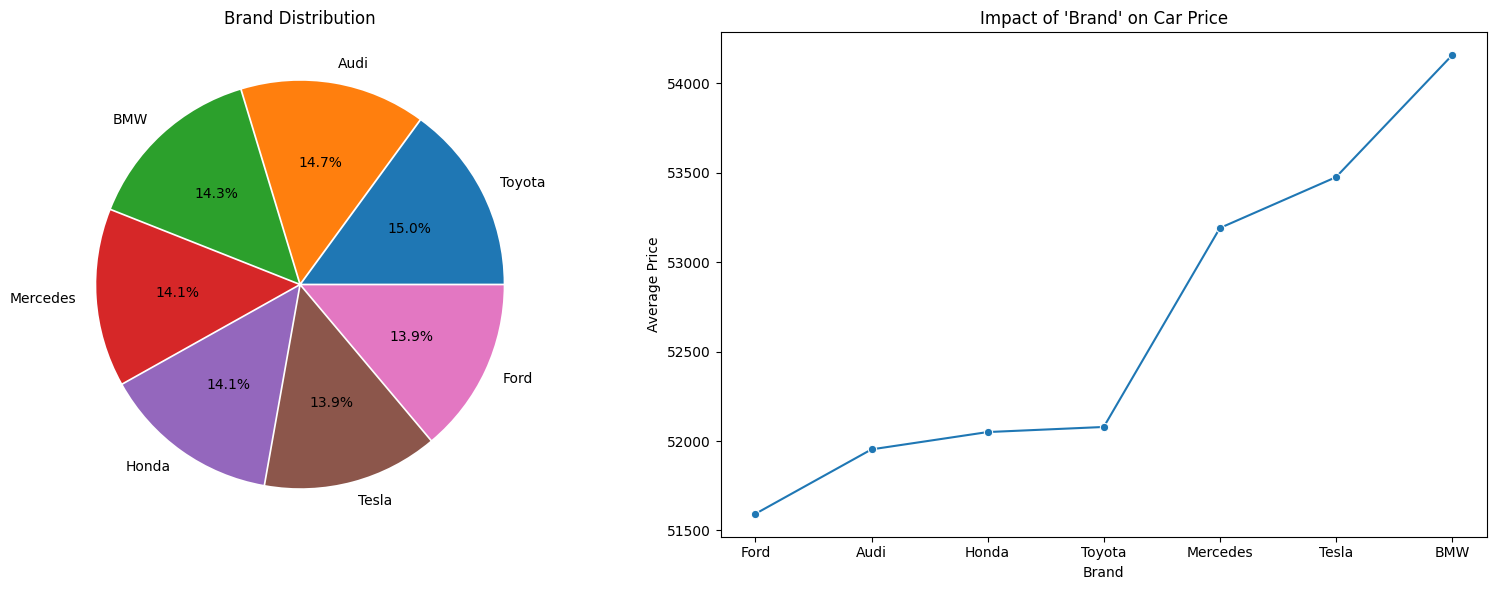

In [33]:
showDisbution_Impact(data, 'brand', 'Brand')

### Brand Vs Mean Price

In [61]:
# brand_avg=data.groupby('brand').agg({"price":'mean'}).reset_index().sort_values(by='price')
# sns.barplot(x='brand',y='price',data=brand_avg,palette="viridis")

### Analysis of Fuel Type and its impact on the Price


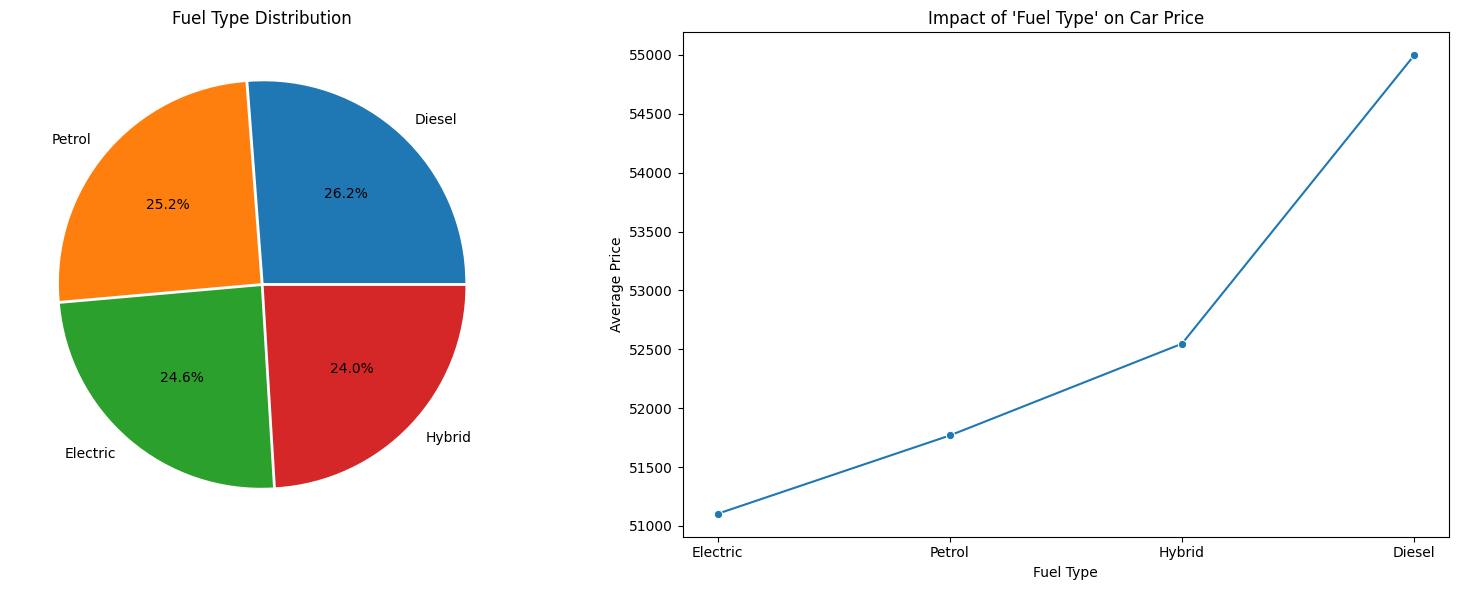

In [34]:
showDisbution_Impact(data, 'fuel_type', 'Fuel Type')

### Analysis of Transmission Column and its impact on Price

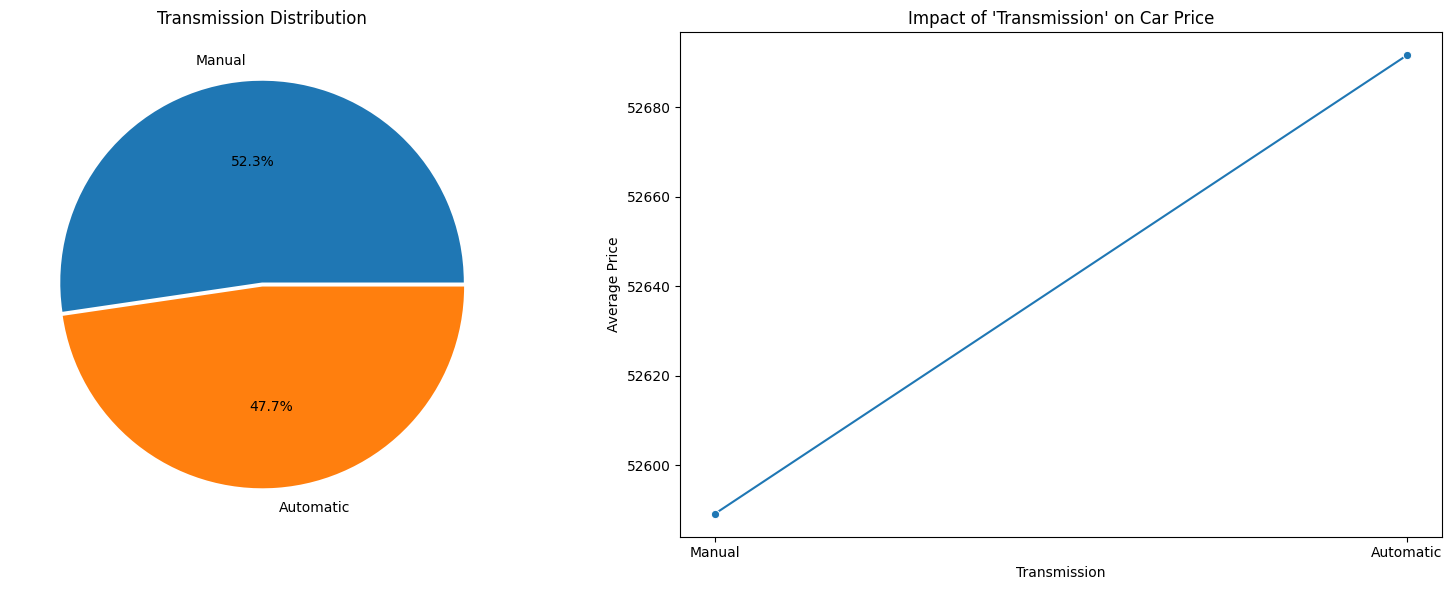

In [35]:
showDisbution_Impact(data, 'transmission', 'Transmission')

### Analysis of condition Column and its impact on Price

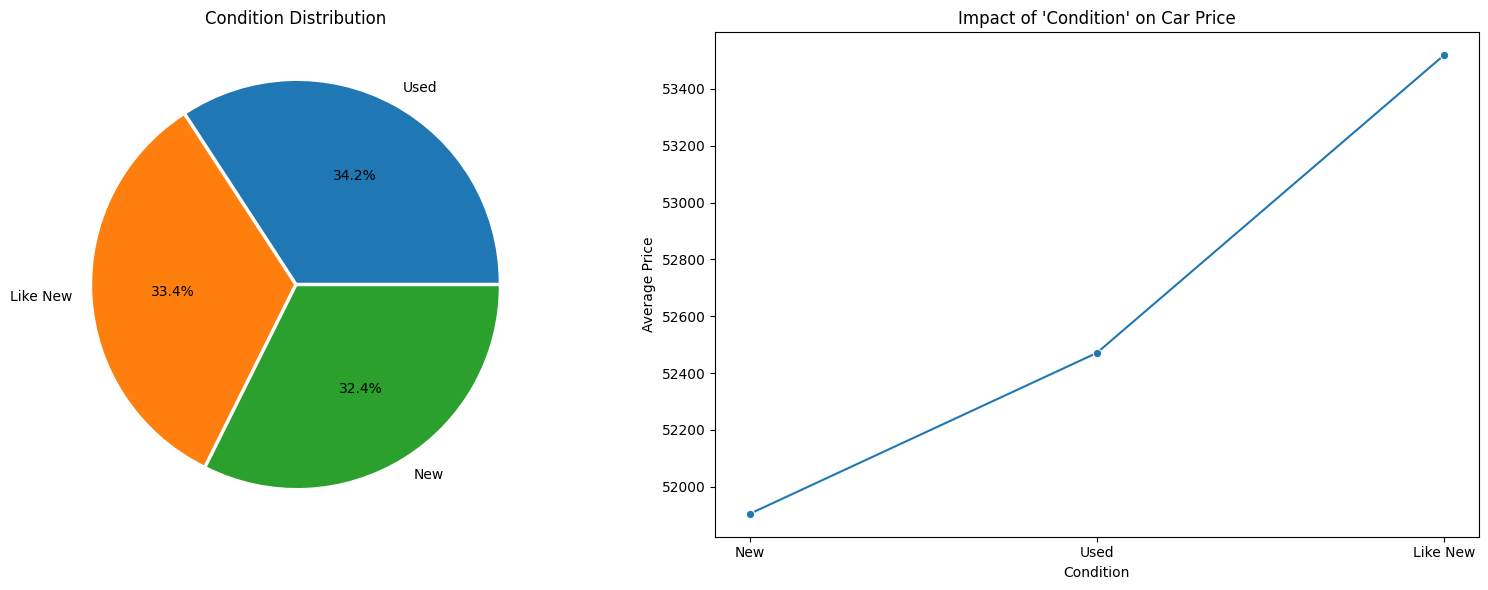

In [36]:
showDisbution_Impact(data, 'condition', 'Condition')

### Checking the outlier values

<ipython-input-37-0e2666761078>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model',y='price',data=data,palette="viridis")


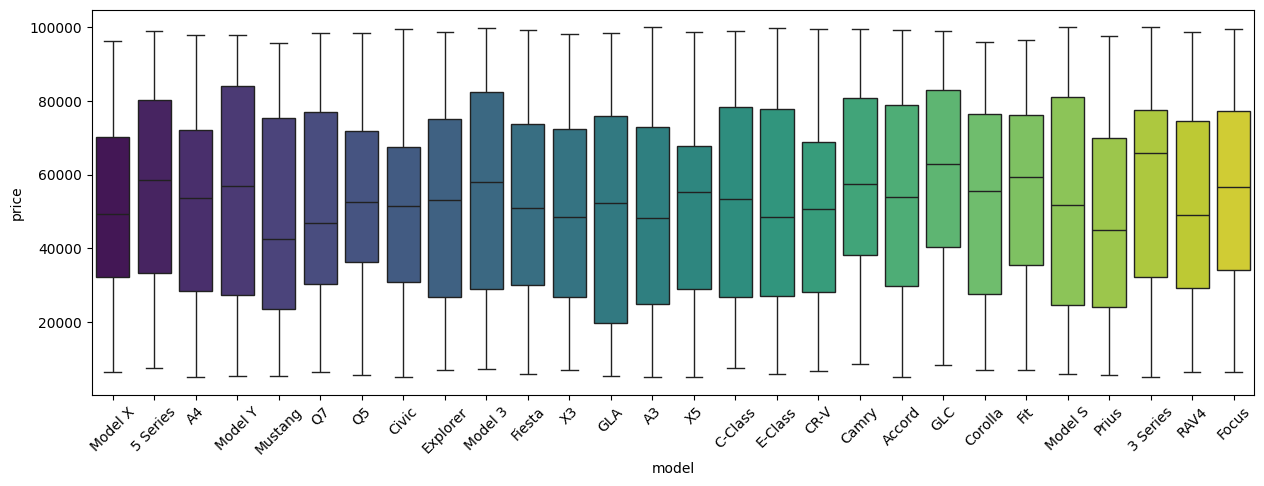

In [37]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.boxplot(x='model',y='price',data=data,palette="viridis")
plt.show()

### Plot distributions for numerical columns

In [38]:
def showBoxplt(df,col):
    df_melted = df.melt(var_name='Variable', value_name='Value')
    # Create a boxplot with custom color
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Variable', y='Value', data=df_melted)  # Set2 is an example palette
    plt.title(f'Boxplot for {col} Column')
    plt.show()


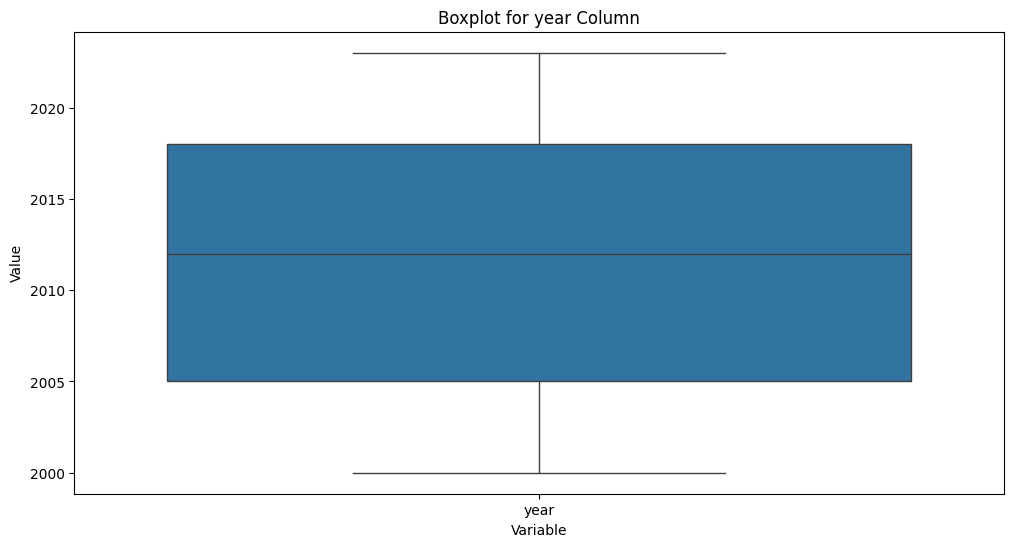

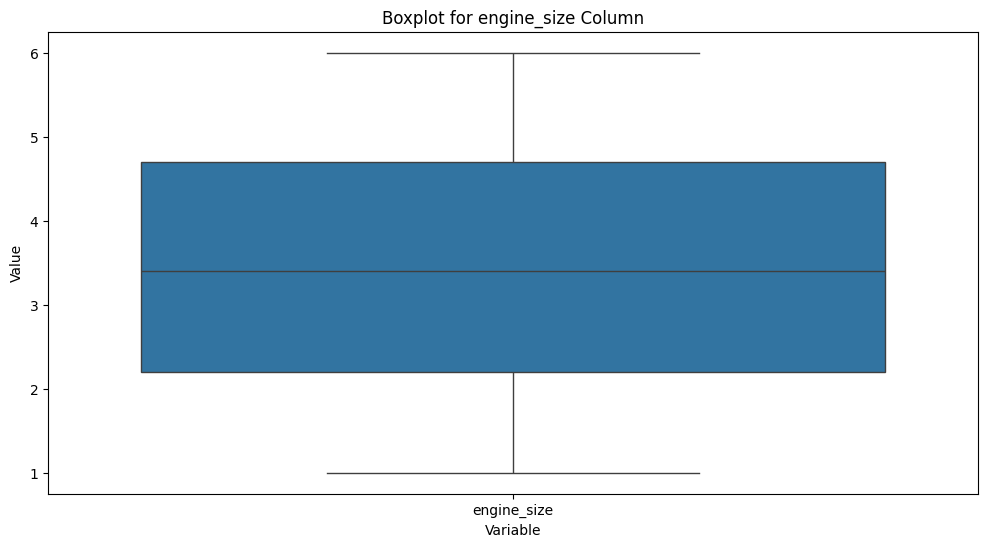

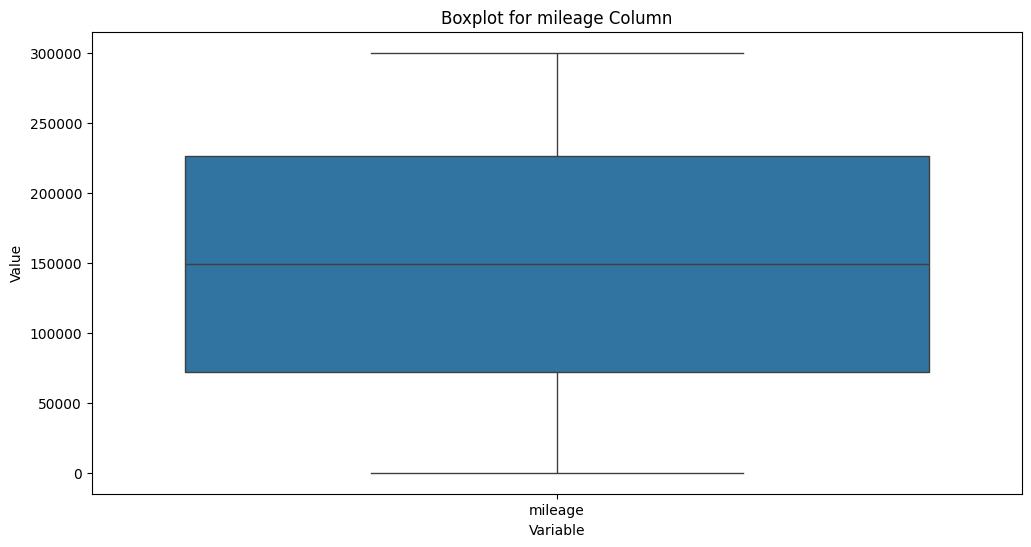

In [17]:
for col in numeric_columns:
    showBoxplt(data[[col]],col)

<Axes: >

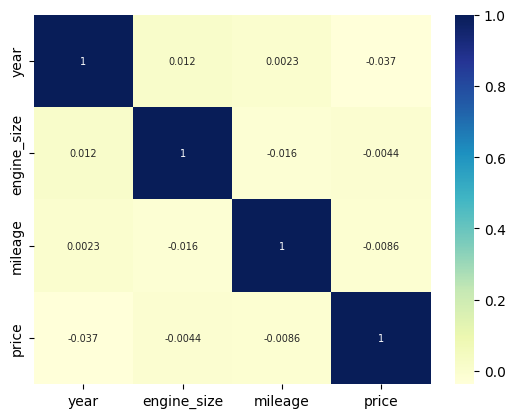

In [39]:
all_numeric = numerical_cols.append(pd.Index(['price']))
dataplot = sns.heatmap(data[all_numeric].corr(), cmap="YlGnBu", annot=True, annot_kws={"size": 7})
# Displaying heatmap
dataplot

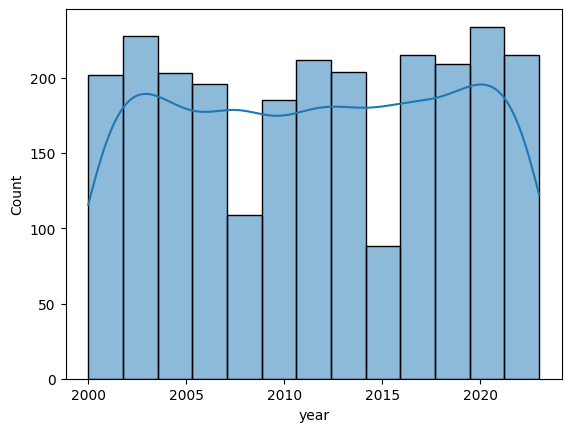

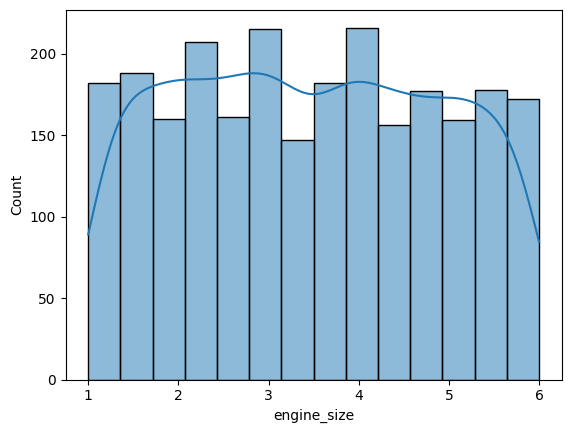

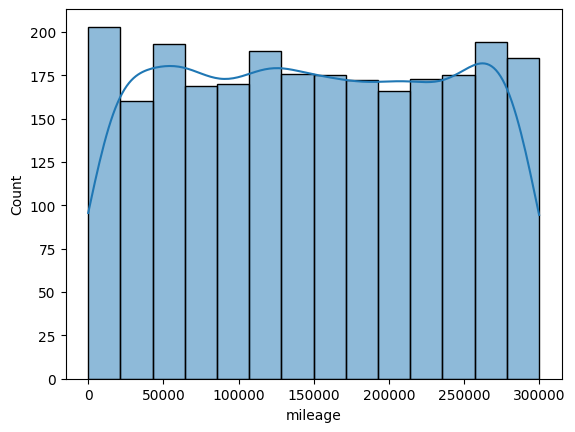

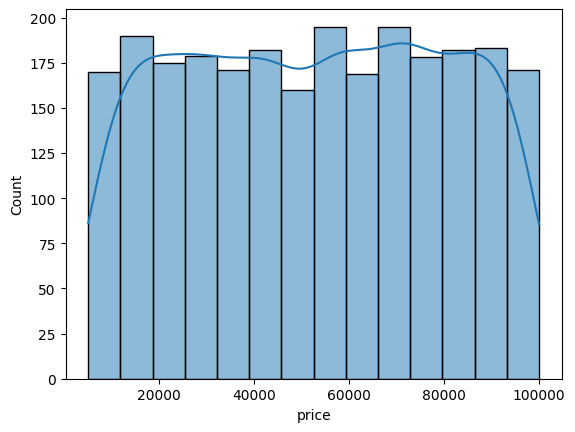

In [40]:
for col in all_numeric:
    sns.histplot(data[col], kde=True)
    plt.show()

In [41]:
data[all_numeric].corr()[target_label].drop(index=target_label)

,price
year,-0.036805
engine_size,-0.004420
mileage,-0.008567


### 3. Model Training

In [64]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

In [44]:
def generate_data(data):
    df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
    df_train = df_full_train.reset_index(drop=True)
    df_val = df_test.reset_index(drop=True)
    y_train = df_train[target_label].values
    y_val = df_val[target_label].values
    del df_train['car_id']
    del df_val['car_id']
    del df_train[target_label]
    del df_val[target_label]
    return df_train, df_val, y_train, y_val

In [52]:
X_train, X_test, y_train, y_test = generate_data(data)
len(X_train), len(X_test), len(y_train), len(y_test)

(2000, 500, 2000, 500)

### Build the Preprocessing Pipeline

In [47]:
# Preprocessing for numerical data: Standard scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: One-hot encoding
categorical_transformer = OneHotEncoder(drop='first')  # Avoid dummy variable trap

# Combine preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


### Define the Pipeline

In [69]:
# Create pipelines for Linear Regression, Ridge, Lasso, and XGBoost
pipelines = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', LinearRegression())]),
    'Ridge Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('model', Ridge())]),
    'Lasso Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('model', Lasso())]),
    'XGBoost': Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', XGBRegressor(objective='reg:squarederror'))])
}



### Set up RandomizedSearchCV for Hyperparameter Tuning

In [72]:
# Hyperparameter grids
param_grids = {
    'Linear Regression': {
        # No parameters to tune for Linear Regression
    },
    'Ridge Regression': {
        'model__alpha': np.logspace(-4, 4, 10),  # Ridge regularization strength
    },
    'Lasso Regression': {
        'model__alpha': np.logspace(-4, 4, 10),  # Lasso regularization strength
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],  # Number of trees
        'model__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
        'model__max_depth': [3, 5, 7]  # Maximum depth of trees
    }
}


### Perform Hyperparameter Tuning

In [75]:
best_params = {}
for name, pipeline in pipelines.items():
    print(name)
    if name in param_grids and param_grids[name]:  # Skip if no hyperparameters to tune
        # Perform GridSearchCV
        search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grids[name],
            scoring='neg_mean_squared_error',
            cv=5  # Cross-validation folds
        )
        search.fit(X_train, y_train)
        best_params[name] = search.best_params_
        print(f"{name} Best Parameters: {search.best_params_}")
    else:
        # Fit without hyperparameter tuning
        pipeline.fit(X_train, y_train)
        best_params[name] = 'No parameters tuned'

Linear Regression
Ridge Regression
Ridge Regression Best Parameters: {'model__alpha': 10000.0}
Lasso Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163214624678.59082, tolerance: 119438262.75402686
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130385778961.4679, tolerance: 117323495.51819612
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194414758525.29895, tolerance: 119128118.10092954
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: Con

Lasso Regression Best Parameters: {'model__alpha': 10000.0}
XGBoost
XGBoost Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 50}


### Evaluate the Best Models

In [76]:
results = []
for name, pipeline in pipelines.items():
    # Fit the pipeline with the best parameters if applicable
    if name in best_params and best_params[name] != 'No parameters tuned':
        pipeline.set_params(**best_params[name])
        pipeline.fit(X_train, y_train)

    # Predict and evaluate
    predictions = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    results.append({'Model': name, 'RMSE': rmse, 'R²': r2})

# Display results
results_df = pd.DataFrame(results)
print(results_df)


               Model          RMSE        R²
0  Linear Regression  27837.994288 -0.025566
1   Ridge Regression  27589.536618 -0.007341
2   Lasso Regression  27590.373096 -0.007402
3            XGBoost  27583.847535 -0.006926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

### save the pipline

In [81]:
import joblib

In [82]:
params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, "random_state": SEED,"n_jobs": -1,"objective": "reg:squarederror"}
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', XGBRegressor(**params))])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print({'Model': name, 'RMSE': rmse, 'R²': r2})
joblib.dump(pipeline, "pipeline.joblib")

{'Model': 'XGBoost', 'RMSE': 27583.84753468942, 'R²': -0.006925828611573204}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


['pipeline.joblib']

### Load and Test

In [85]:
X1 = X_test.iloc[1]
X2 = X_test.iloc[2]
X1.to_json(), X2.to_json()

('{"brand":"BMW","year":2020,"engine_size":4.2,"fuel_type":"Electric","transmission":"Automatic","mileage":141294,"condition":"Like New","model":"X5"}',
 '{"brand":"Mercedes","year":2018,"engine_size":3.9,"fuel_type":"Hybrid","transmission":"Automatic","mileage":218811,"condition":"Like New","model":"C-Class"}')

In [90]:
pipeline_load = joblib.load("pipeline.joblib")
prediction = pipeline_load.predict(pd.DataFrame([X1]))
prediction[0]

51707.617

In [91]:
prediction = pipeline_load.predict(pd.DataFrame([X2]))
prediction[0]

52691.645

### Save Coulmn Attributes

In [98]:
import json
col_attr = {}
for col in X_test.columns:
    if col in categorical_cols:
        if X_test.dtypes[col] == "object":
            col_attr[col] = ("category", list(X_test[col].unique()))
        else:
            col_attr[col] = ("category", list(map(int, X_test[col].unique())))
    else:
        col_attr[col] = ("numeric", str(X_test
                                        .dtypes[col]), X_test[col].min(), X_test[col].max())

with open("columns_attributes.json", "w") as f_out:
    json.dump(col_attr, f_out, indent=4)

year count     500.000000
mean     2011.672000
std         6.976658
min      2000.000000
25%      2006.000000
50%      2012.000000
75%      2018.000000
max      2023.000000
Name: year, dtype: float64
engine_size count    500.000000
mean       3.516400
std        1.425776
min        1.000000
25%        2.300000
50%        3.600000
75%        4.700000
max        6.000000
Name: engine_size, dtype: float64
mileage count       500.000000
mean     151167.252000
std       88382.808513
min          56.000000
25%       73520.000000
50%      154148.500000
75%      228759.750000
max      299461.000000
Name: mileage, dtype: float64


In [100]:
brand_model = data.groupby('brand')['model'].unique().apply(list).to_dict()
with open("brand_models.json", "w") as f_out:
    json.dump(brand_model, f_out, indent=4)

In [101]:
#!pip freeze > requirements.txt